# Review: Practical Application of diff and patch

#### There is code that you need to fix from a colleague, but it has errors.

In [1]:
#!/usr/bin/env python3

import shutil

def check_disk_usage(disk, min_absolute, min_percent):
    """Returns True if there is enough free disk space, false otherwise."""
    du = shutil.disk_usage(disk)
    # Calculate the percentage of free space
    percent_free = 100 * du.free / du.total
    # Calculate how many free gigabytes
    gigabytes_free = du.free / 2**30
    if percent_free < min_percent or gigabytes_free < min_absolute:
        return False
    return True

# Check for at least 2 GB and 10% free
if not check_disk_usage("/", 2*2**30, 10):
    print("ERROR: Not enough disk space")
    return 1

print("Everything ok")
return 0

SyntaxError: 'return' outside function (1236608830.py, line 19)

#### Create two copies of the file: one called "original" and "fixed"

- cp disk_usage.py disk_usage_original.py 
- cp disk_usage.py disk_usage_fixed.py 

#### Fix the file called "fixed"
##### Once the file fixed it should be running without errors

In [8]:
#!/usr/bin/env python3

import shutil
import sys

def check_disk_usage(disk, min_absolute, min_percent):
    """Returns True if there is enough free disk space, false otherwise."""
    du = shutil.disk_usage(disk)
    # Calculate the percentage of free space
    percent_free = 100 * du.free / du.total
    # Calculate how many free gigabytes
    gigabytes_free = du.free / 2**30
    if percent_free < min_percent or gigabytes_free < min_absolute:
        return False
    return True

# Check for at least 2 GB and 10% free
if not check_disk_usage("/", 2, 10):
    print("ERROR: Not enough disk space")
    sys.exit(1)

print("Everything ok")|
sys.exit(0)

SyntaxError: invalid syntax (747116770.py, line 22)

##### Create the diff file using the one "fixed" and the "original"

### ***** Create the diff *****
- diff -u disk_usage_original.py disk_usage_fixed.py > disk_usage.diff
### Read the file created
- cat disk_usage.diff 

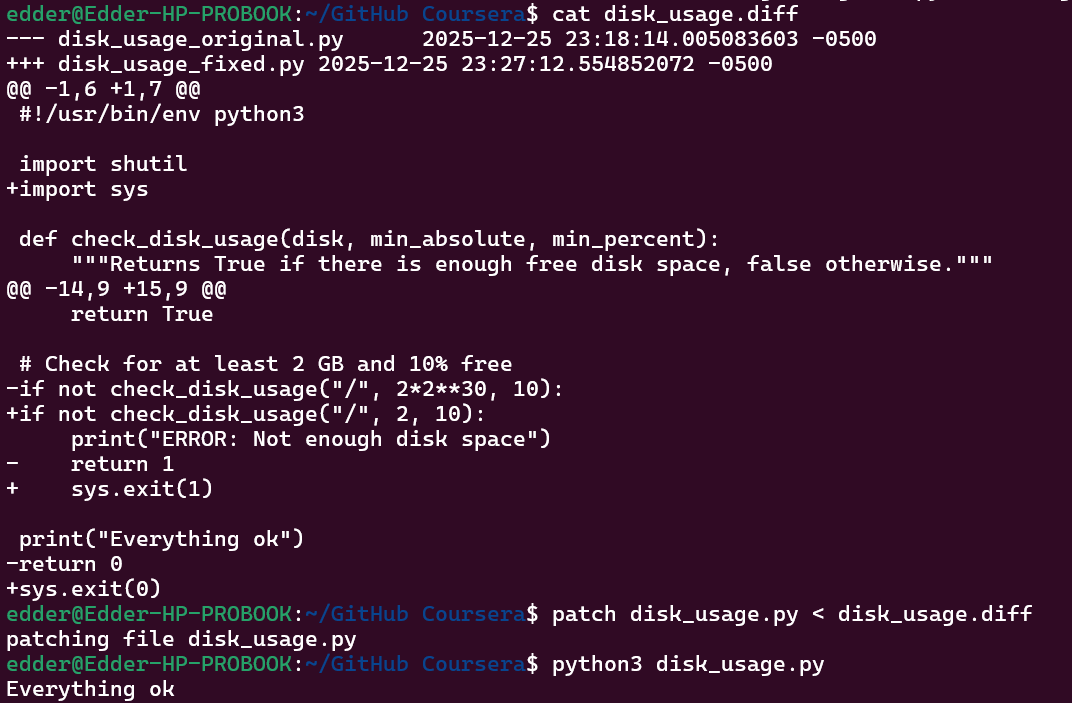

In [9]:
from IPython.display import Image
Image("C:/Users/admin/OneDrive/GitHub/diff and patch/2025-12-26_12-00-15.png")

#### - indicates removed
#### + indicates added

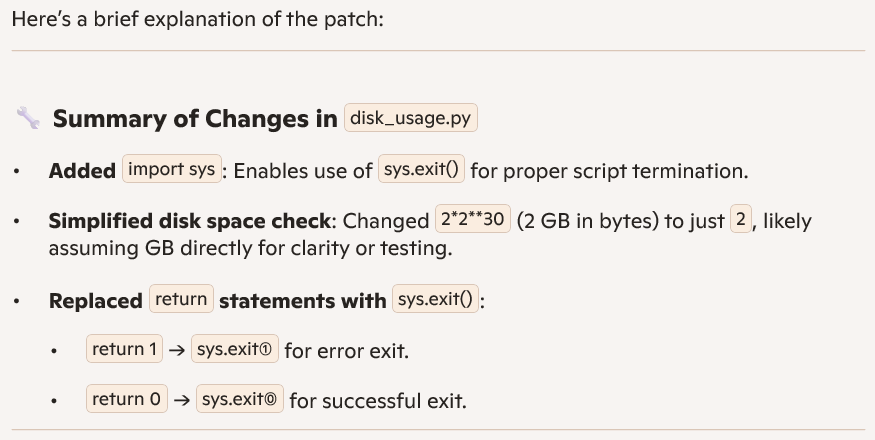

In [10]:
from IPython.display import Image
Image("C:/Users/admin/OneDrive/GitHub/diff and patch/2025-12-26_12-07-03.png")

### Do the patch in the very original file:
#### ***** patch disk_usage.py < disk_usage.diff *****

**With this command the diff file is applied to the very original file and the file got corrcted automatically**